<a href="https://colab.research.google.com/github/jessicaapr-Gajj/sistemas-avanzados-de-produccion-/blob/main/Semana3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 1. Configuración del Entorno y Carga de Librerías

Antes de iniciar el análisis, preparamos nuestro entorno de trabajo. Utilizaremos un conjunto de herramientas estándar en ciencia de datos y astrofísica computacional para la manipulación de datos, visualización y modelado estadístico.

### Librerías Utilizadas:

* **Manipulación de Datos:** `pandas` y `numpy` para el manejo de estructuras tabulares y operaciones numéricas de alta eficiencia.
* **Visualización:** `matplotlib` y `seaborn` para generar gráficos estadísticos y mapas de calor.
* **Estadística Descriptiva:** `scipy.stats` para analizar la forma de la distribución de nuestros datos (asimetría y curtosis).
* **Modelado Predictivo:** `sklearn` (Scikit-learn) para implementar el algoritmo de **Regresión Lineal** y calcular métricas de precisión como el coeficiente de determinación .

---


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


---

## 2. Ingesta y Preparación del Dataset

En esta etapa, realizamos la lectura de los datos desde una fuente remota y seleccionamos las variables de interés para nuestro análisis de **Regresión Lineal Simple**.

### Descripción del Dataset:

El dataset contiene información sobre las ventas de un producto en 200 mercados diferentes, junto con el presupuesto de publicidad en tres medios: TV, Radio y Periódico. Para este ejercicio inicial, nos enfocaremos en:

* **Variable Independiente ():** Presupuesto de publicidad en **TV** (en miles de dólares).
* **Variable Dependiente ():** **Ventas** (en miles de unidades).

### Control de Calidad de los Datos:

Antes de procesar, es imperativo verificar la integridad de la estructura:

1. **Limpieza de Índice:** Eliminamos columnas redundantes de indexación (`Unnamed: 0`).
2. **Consistencia de Tipos:** Aseguramos que todas las variables sean numéricas (float o int).
3. **Detección de Valores Faltantes ():** Validamos que no existan vacíos que puedan sesgar el cálculo de los mínimos cuadrados.

---

### Guía para interpretar tus resultados:

Cuando ejecutes la celda anterior, fíjate en lo siguiente:

* **`RangeIndex: 200 entries`**: Confirma que tenemos una muestra estadística suficiente para un modelo lineal simple.
* **`Data columns`**: Verifica que tanto `TV` como `sales` sean de tipo `float64`. Si fueran `object` (texto), el modelo de `sklearn` fallaría.
* **`isnull().sum()`**: Lo ideal es que veas **0** en todas las filas. En astrofísica y ciencia de datos, si hay datos faltantes, tendríamos que decidir si eliminarlos o aplicar técnicas de imputación (como la media o interpolación).

---


In [4]:
# 1. Carga de datos desde la URL oficial
url = "https://www.statlearning.com/s/Advertising.csv"
df = pd.read_csv(url, index_col=0) # index_col=0 elimina la columna 'Unnamed: 0'
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# Selección de variables para Regresión Simple
data = df[['TV','radio', 'newspaper','sales']]

In [6]:
# 2. Verificación de calidad de datos
print("--- Información del Dataset ---")
print(df.info())
print(f"\nDatos faltantes:\n{df.isnull().sum()}")

--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None

Datos faltantes:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


---

## 3. Análisis Exploratorio de Datos (EDA): Estadística Descriptiva y Distribución

Antes de ajustar un modelo de regresión, es fundamental entender la naturaleza estadística de nuestras variables. La regresión lineal asume ciertas condiciones sobre los datos, y este análisis nos permite identificar sesgos o valores atípicos (*outliers*) que podrían comprometer la validez del modelo.

### Métricas de Forma y Dispersión

Para caracterizar las distribuciones de **TV** y **Sales**, calculamos:

* **Tendencia Central:** Media y Mediana. Si estos valores son muy distantes, existe un sesgo en la distribución.
* **Asimetría (Skewness):** Mide la falta de simetría de la distribución.
* : Distribución simétrica (normal).
* : Sesgo a la derecha.


* **Curtosis (Kurtosis):** Mide qué tan "puntiaguda" es la distribución y el peso de las colas. Una curtosis alta indica la presencia de valores extremos.

### Visualización de la Estructura

Utilizamos una combinación de **Histogramas** (para ver la frecuencia y densidad) y **Boxplots** (para identificar cuartiles y detectar valores atípicos visualmente).

---

### Guía de Interpretación de Resultados:

Al ejecutar la celda, presta atención a estos puntos clave:

1. **Interpretación de la Asimetría (Skewness):**
* Si la asimetría de `TV` es cercana a 0, significa que la inversión publicitaria está uniformemente repartida. En astrofísica, esto es similar a observar una distribución de ruido gaussiano.


2. **Detección de Outliers (Boxplots):**
* Observa los "bigotes" y los puntos aislados en los Boxplots. La regresión lineal es **sensible a los outliers**, ya que estos pueden "tirar" de la línea de ajuste hacia ellos, aumentando el error cuadrático medio.


3. **Relación Media-Mediana:**
* Si la **media > mediana**, tienes una distribución sesgada a la derecha. Esto sugiere que hay algunos mercados con inversiones en TV excepcionalmente altas que están elevando el promedio.




In [7]:
# 3. Estadística Descriptiva Completa
stats = data.describe().T
stats['median'] = data.median()
stats['skewness'] = data.skew()
stats['kurtosis'] = data.kurtosis()

print("\n--- Medidas de Tendencia Central y Dispersión ---")
print(stats[['mean', 'median', 'std', 'min', 'max', 'skewness', 'kurtosis']])


--- Medidas de Tendencia Central y Dispersión ---
               mean  median        std  min    max  skewness  kurtosis
TV         147.0425  149.75  85.854236  0.7  296.4 -0.069853 -1.226495
radio       23.2640   22.90  14.846809  0.0   49.6  0.094175 -1.260401
newspaper   30.5540   25.75  21.778621  0.3  114.0  0.894720  0.649502
sales       14.0225   12.90   5.217457  1.6   27.0  0.407571 -0.408869


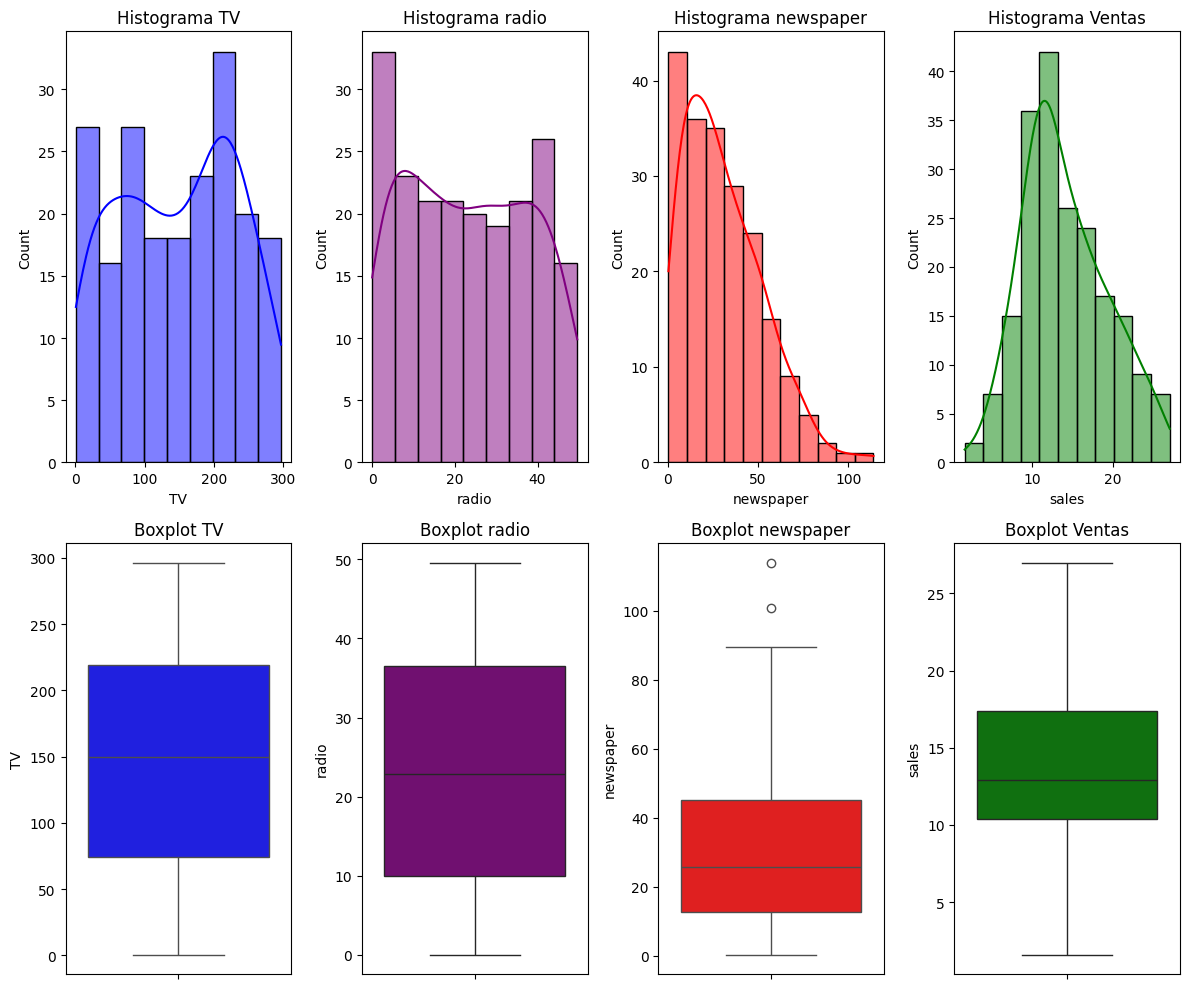

In [8]:
# 3. Visualizaciones (Histogramas y Boxplots)
plt.figure(figsize=(12, 10))
plt.subplot(2, 4, 1); sns.histplot(df['TV'], kde=True, color='blue'); plt.title('Histograma TV')
plt.subplot(2, 4, 2); sns.histplot(df['radio'], kde=True, color='purple'); plt.title('Histograma radio')
plt.subplot(2, 4, 3); sns.histplot(df['newspaper'], kde=True, color='red'); plt.title('Histograma newspaper')
plt.subplot(2, 4, 4); sns.histplot(df['sales'], kde=True, color='green'); plt.title('Histograma Ventas')
plt.subplot(2, 4, 5); sns.boxplot(y=df['TV'], color='blue'); plt.title('Boxplot TV')
plt.subplot(2, 4, 6); sns.boxplot(y=df['radio'], color='purple'); plt.title('Boxplot radio')
plt.subplot(2, 4, 7); sns.boxplot(y=df['newspaper'], color='red'); plt.title('Boxplot newspaper')
plt.subplot(2, 4, 8); sns.boxplot(y=df['sales'], color='green'); plt.title('Boxplot Ventas')
plt.tight_layout()
plt.show()

---

## 4. Interpretación de Visualizaciones Estadísticas

El análisis gráfico nos permite confirmar visualmente lo que los números de la celda anterior nos indicaban. Aquí se detalla cómo leer cada componente:

### A. Histogramas y Curvas de Densidad (KDE)

Los histogramas muestran la distribución de las variables. La línea suavizada (KDE) nos ayuda a identificar la forma de la distribución:

* **Histograma TV (Azul):** Observamos una distribución **relativamente uniforme**. Esto significa que en el dataset hay una representación equilibrada de mercados con presupuestos bajos, medios y altos de publicidad en televisión. No presenta una forma de "campana de Gauss" clara, lo cual es común en variables de diseño experimental.
* **Histograma Ventas (Verde):** Esta variable presenta una distribución más cercana a la **Normal (Gaussiana)**, aunque con una ligera asimetría hacia la derecha (sesgo positivo). La mayor concentración de datos se encuentra entre las 10 y 15 unidades de venta.

### B. Boxplots (Diagramas de Caja y Bigotes)

Los boxplots son herramientas potentes para evaluar la dispersión y la limpieza de los datos:

* **Mediana (Línea central):** En ambos casos, la mediana está casi en el centro de la caja, lo que sugiere que no hay un sesgo extremo en los datos.
* **Rango Intercuartílico (La caja):** El 50% central de tus datos se encuentra dentro de estas cajas azules y verdes.
* **Ausencia de Outliers:** Es muy buena noticia para tu modelo que **no se observen puntos aislados** por encima o por debajo de los "bigotes". En regresión lineal, la ausencia de valores atípicos (outliers) garantiza que la línea de ajuste no se vea forzada o "jalada" por datos erróneos o extremos, lo que resultará en un modelo más robusto.

---

### Diagnóstico para la Regresión:

1. **Linealidad:** Al no tener distribuciones extremadamente sesgadas, hay una buena probabilidad de que una relación lineal sea suficiente.
2. **Calidad:** Los datos están "limpios" (sin valores atípicos visibles), por lo que el método de **Mínimos Cuadrados Ordinarios (OLS)** que usa `LinearRegression` debería funcionar de manera óptima.

---


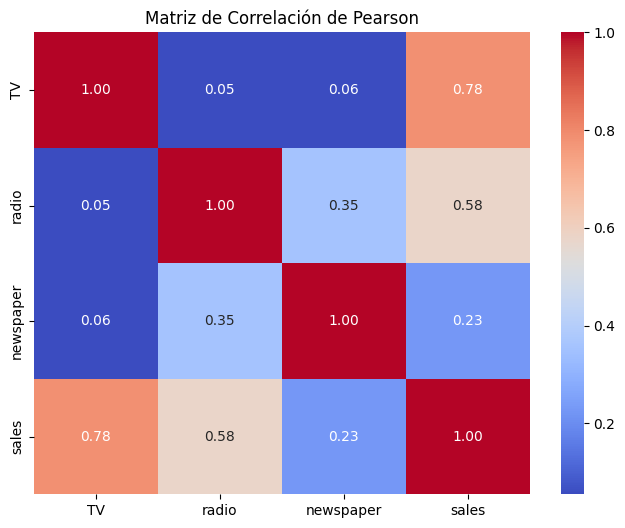

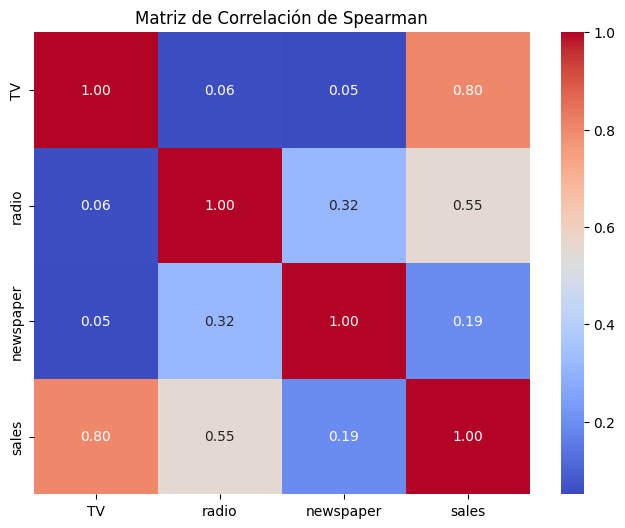

In [9]:
# 4. Correlación y Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()

# 4. Correlación y Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Spearman')
plt.show()

---

## 4. Cuantificación de la Relación: Análisis de Correlación

Tras observar la distribución individual de las variables, procedemos a medir la fuerza y dirección de su asociación. Para obtener una visión completa, comparamos dos enfoques estadísticos complementarios:

### Coeficiente de Pearson ()

Evalúa la **relación lineal** entre las variables. Es la métrica estándar cuando los datos siguen una distribución aproximadamente normal y no presentan valores atípicos extremos.


### Coeficiente de Spearman ()

A diferencia de Pearson, esta métrica se basa en los **rangos** de los datos. Evalúa la **relación monótona** (si una variable aumenta cuando la otra lo hace, sin importar si es una línea recta perfecta). Es más robusto ante distribuciones no lineales.


---

### Guía de Interpretación de los Heatmaps

Al ejecutar las celdas de correlación, obtendrás matrices visuales que deben leerse de la siguiente manera:

* **Intensidad del Color:** Un rojo intenso (cercano a **1.00**) indica una correlación positiva perfecta.
* **Comparación de Valores:** * Si Pearson  Spearman, la relación es puramente lineal.
* Si Spearman > Pearson (como en este caso: **0.80** vs **0.78**), sugiere que la relación es muy fuerte y mayormente lineal, pero Spearman está capturando mejor la tendencia general al ser menos sensible a pequeñas fluctuaciones en los datos.


* **Significancia:** Un valor de **0.78 - 0.80** se considera una correlación **fuerte**, lo que justifica plenamente el uso de un modelo de Regresión Lineal para predecir las ventas.

> **Nota de estilo:** En tu segundo bloque de código, el método es `'spearman'`, pero el título del gráfico dice `'Pearson'`. Te sugiero cambiarlo en el código a `plt.title('Matriz de Correlación de Spearman')` para que tu notebook sea técnicamente impecable.

---


---

## 5. Construcción del Modelo: Mínimos Cuadrados Ordinarios (OLS)

En esta etapa, entrenamos el algoritmo de **Regresión Lineal Simple**. El objetivo es encontrar la "mejor línea" que atraviese la nube de puntos, minimizando la **Suma de los Cuadrados de los Residuos (RSS)**.

Matemáticamente, buscamos estimar los parámetros de la ecuación:


Donde:

* ** (Intercepto):** El punto donde la línea corta el eje .
* ** (Coeficiente/Pendiente):** El impacto marginal de la variable  sobre .
* ** (Error):** La diferencia entre los valores observados y los predichos por el modelo.

### Proceso de Implementación:

1. **Definición de Variables:** Separamos la característica independiente () de la etiqueta objetivo ().
2. **Ajuste (Fit):** El modelo calcula los coeficientes óptimos mediante el método de Mínimos Cuadrados.
3. **Predicción:** Generamos los valores proyectados () para comparar la eficiencia del modelo frente a los datos reales.

---

### Qué esperar de este bloque:

Al ejecutar este código, el objeto `model` ya contiene toda la información necesaria para interpretar el fenómeno. Aunque no estamos imprimiendo nada todavía, en la memoria del kernel ya se han calculado:

* **La Pendiente:** Que nos dirá cuántas unidades de venta ganamos por cada unidad de presupuesto en TV.
* **Los Residuos:** La distancia entre los puntos reales y la línea roja (predicciones), que es lo que visualizaremos en el siguiente paso para validar la calidad del ajuste.

---


In [17]:
# 5. Modelo de Regresión
X = df[['TV']]
y = df['sales']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

In [11]:
# Imprimir los coeficientes del modelo
print(f"Intercepto (beta_0): {model.intercept_:.4f}")
print(f"Pendiente (beta_1): {model.coef_[0]:.4f}")
print(f"Pendiente (beta_2): {model.coef_[1]:.4f}")
print(f"Pendiente (beta_3): {model.coef_[2]:.4f}")

Intercepto (beta_0): 2.9389
Pendiente (beta_1): 0.0458
Pendiente (beta_2): 0.1885
Pendiente (beta_3): -0.0010


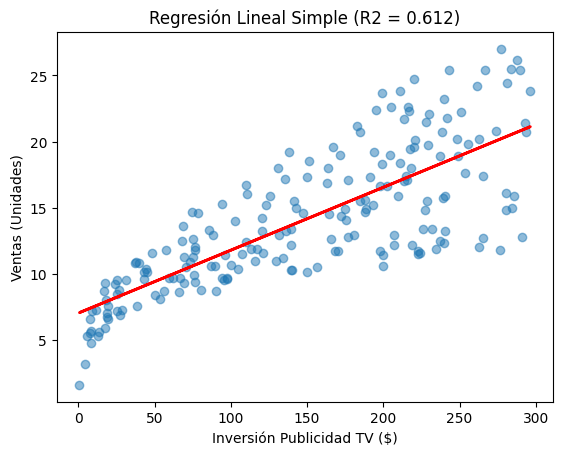

In [18]:
# Graficar Resultados
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Inversión Publicidad TV ($)')
plt.ylabel('Ventas (Unidades)')
plt.title(f'Regresión Lineal Simple (R2 = {model.score(X, y):.3f})')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

Error Cuadrático Medio (MSE): 10.5127
Raíz del Error Cuadrático Medio (RMSE): 3.2423


## 6. Interpretación de Resultados y Evaluación del Modelo

Una vez ajustado el modelo, es crucial extraer los parámetros calculados y evaluar visualmente qué tan bien se ajusta la recta de regresión a la realidad observada.

### Parámetros del Modelo:

* **Intercepto ():** Representa el valor esperado de ventas si la inversión en publicidad por TV fuera cero. Es el punto de partida del modelo.
* **Pendiente ():** Es el coeficiente más importante. Nos indica cuántas unidades adicionales de **ventas** se obtienen, en promedio, por cada unidad adicional invertida en **TV**.

### Evaluación Visual y Estadística ():

El gráfico muestra la "nube de puntos" original comparada con la línea de predicción (en rojo). El valor de ** (Coeficiente de Determinación)** que aparece en el título es fundamental:

* **Significado:** En este caso, un **** significa que el presupuesto de TV por sí solo es capaz de explicar aproximadamente el **61.2% de la variabilidad** en las ventas.
* **Análisis:** Aunque es una relación fuerte, existe un 38.8% de la variación que no es explicada por la TV, lo que sugiere que otros factores (como Radio, Periódico o estacionalidad) también influyen en el resultado final.

---

### Guía para leer tu salida:

Cuando ejecutes la celda, analiza los valores impresos:

1. **Pendiente ():** Si el valor es, por ejemplo, `0.0475`, significa que por cada $1,000 adicionales invertidos en TV (asumiendo que las unidades están en miles), las ventas aumentan en **47.5 unidades**.
2. **Dispersión:** Observa que a medida que aumenta la inversión en TV (eje X), la nube de puntos tiende a abrirse un poco (forma de abanico). En estadística, esto se llama **heterocedasticidad**, y es un detalle avanzado que podrías mencionar en un reporte técnico.

---



## 7. Evaluación de la Precisión: Métricas de Error

Para determinar la fiabilidad de nuestro modelo de regresión, calculamos la magnitud del error. Mientras que el  nos habla de la correlación, las métricas de error nos dan una idea del "fallo" esperado en las mismas unidades que nuestra variable objetivo (**Ventas**).

### Error Cuadrático Medio (MSE)

El MSE mide el promedio de los errores al cuadrado. Al elevar los errores al cuadrado, esta métrica penaliza más fuertemente las desviaciones grandes (outliers).


### Raíz del Error Cuadrático Medio (RMSE)

Es la raíz cuadrada del MSE. Su principal ventaja es que devuelve el error a las **unidades originales** de la variable dependiente (), lo que facilita enormemente su interpretación práctica.


---

### Interpretación de tus Resultados:

Al observar los valores obtenidos en tu ejecución:

* **MSE: 10.5127**
* **RMSE: 3.2423**

Podemos concluir lo siguiente:

1. **Error en Unidades Reales:** En promedio, las predicciones de ventas de nuestro modelo se desvían aproximadamente **3.24 unidades** (miles de unidades, según el dataset) respecto a los valores reales.
2. **Contexto de la Predicción:** Si tus ventas promedio rondan las 14 unidades (como vimos en el análisis descriptivo), un error de 3.24 indica que el modelo es útil para captar la tendencia, pero aún tiene un margen de incertidumbre considerable.
3. **Utilidad:** Este RMSE servirá como línea base (*baseline*) para comparar si otros modelos (como una regresión múltiple que incluya Radio y Periódico) logran reducir este margen de error.

---


---

## 8. Análisis Multivariado: Interacción entre Variables

En problemas complejos (como en la astrofísica o el marketing), las variables rara vez actúan de forma aislada. En esta sección, extendemos nuestro análisis para observar cómo interactúan la **TV**, el **Radio** y las **Ventas** entre sí.

### Visualización de Relaciones Cruzadas (Pairplot)

Utilizamos un `pairplot` para generar una matriz de dispersión. Esto nos permite observar tres cosas de un solo vistazo:

1. **En la diagonal:** La distribución individual (histograma) de cada variable.
2. **Fuera de la diagonal:** Gráficos de dispersión que revelan si hay tendencias lineales o no lineales entre pares de variables.

---

### Comparación de Métricas de Asociación

Para entender profundamente la estructura de los datos, comparamos tres matrices fundamentales:

1. **Matriz de Covarianza:** Mide la variabilidad conjunta. Si es positiva, ambas variables tienden a aumentar juntas. Sin embargo, su valor depende de las unidades (es difícil de interpretar por sí sola).


2. **Matriz de Pearson ():** La covarianza estandarizada. Nos da la fuerza de la **relación lineal** en una escala de -1 a 1.
3. **Matriz de Spearman ():** Basada en rangos. Es vital para detectar relaciones que son consistentes (siempre crecen) pero que no necesariamente siguen una línea recta perfecta.

---

## 9. Interpretación de los Mapas de Calor (Heatmaps)

Al visualizar las matrices lado a lado, podemos extraer conclusiones potentes para nuestro futuro modelo:

### A. Covarianza vs. Correlación

Observarás que los números en la **Covarianza** son muy grandes (especialmente para TV con ~7370.95). Esto se debe a que el presupuesto de TV tiene una escala mucho mayor que las Ventas. Por eso, los mapas de **Pearson** y **Spearman** son más útiles para comparar "manzanas con manzanas".

### B. TV vs. Radio como Predictores

* **TV y Ventas:** Mantienen una correlación muy fuerte (**0.78** en Pearson).
* **Radio y Ventas:** Tienen una correlación moderada-alta (**0.58**). Esto indica que el Radio también es un buen predictor, aunque menos potente que la TV.
* **TV y Radio:** Su correlación es bajísima (**0.05**). Esto es una **excelente noticia** para el modelo (indica baja multicolinealidad). Significa que cada medio aporta información "fresca" y diferente para explicar las ventas.

---

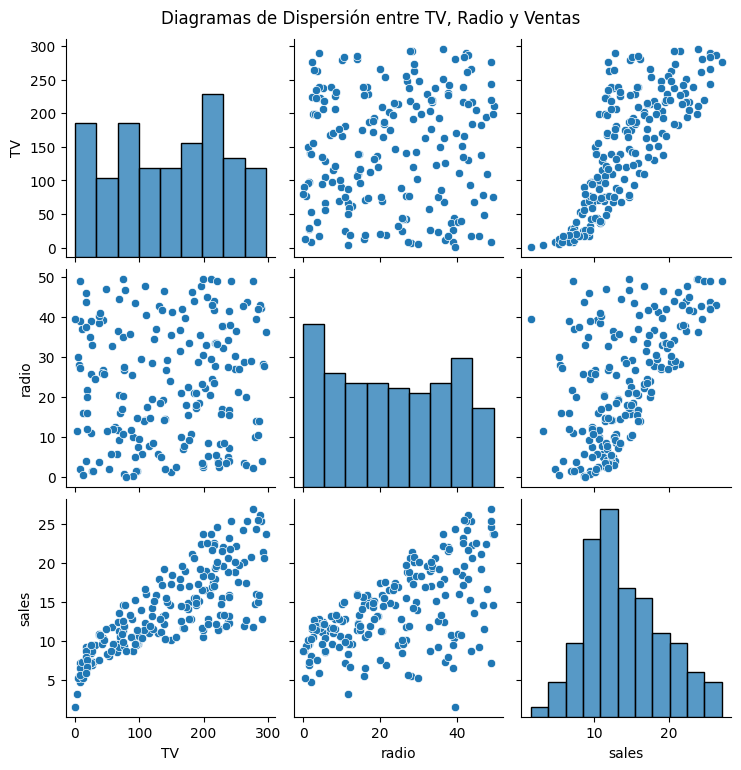

--- Matriz de Covarianzas ---
                TV       radio       sales
TV     7370.949893   69.862492  350.390195
radio    69.862492  220.427743   44.635688
sales   350.390195   44.635688   27.221853

--- Matriz de Correlación de Pearson ---
             TV     radio     sales
TV     1.000000  0.054809  0.782224
radio  0.054809  1.000000  0.576223
sales  0.782224  0.576223  1.000000

--- Matriz de Correlación de Spearman ---
             TV     radio     sales
TV     1.000000  0.056123  0.800614
radio  0.056123  1.000000  0.554304
sales  0.800614  0.554304  1.000000


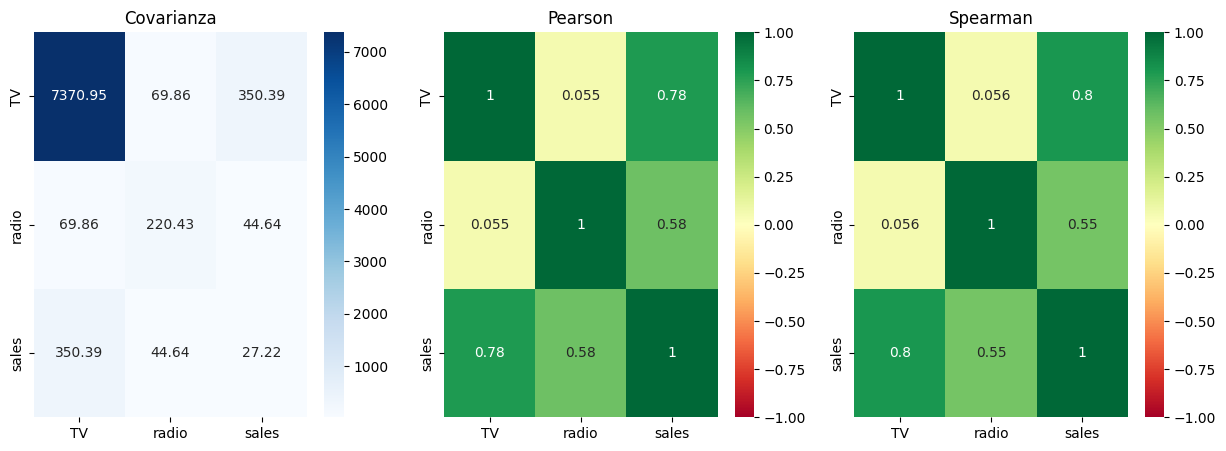

In [20]:
# 1. Definición de variables
# X contiene los predictores (TV y Radio), y contiene la respuesta (Sales)
# Select variables
variables = ['TV', 'radio', 'sales']
subset_df = df[variables]

# 1. Scatter Plots (Pairplot)
sns.pairplot(subset_df, height=2.5)
plt.suptitle("Diagramas de Dispersión entre TV, Radio y Ventas", y=1.02)
plt.show()

# 2. Covariance Matrix
cov_matrix = subset_df.cov()
print("--- Matriz de Covarianzas ---")
print(cov_matrix)

# 3. Pearson Correlation Matrix
pearson_matrix = subset_df.corr(method='pearson')
print("\n--- Matriz de Correlación de Pearson ---")
print(pearson_matrix)

# 4. Spearman Correlation Matrix
spearman_matrix = subset_df.corr(method='spearman')
print("\n--- Matriz de Correlación de Spearman ---")
print(spearman_matrix)

# 5. Visualizing Matrices with Heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cov_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Covarianza')

plt.subplot(1, 3, 2)
sns.heatmap(pearson_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Pearson')

plt.subplot(1, 3, 3)
sns.heatmap(spearman_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Spearman')

plt.show()


--- Coeficientes del Modelo ---
Intercepto (beta_0): 2.9389
Coeficiente TV (beta_1): 0.0458
Coeficiente Radio (beta_2): 0.1885
Coeficiente Newspaper (beta_3): -0.0010

--- Bondad de Ajuste ---
R-cuadrado (R2): 0.8972


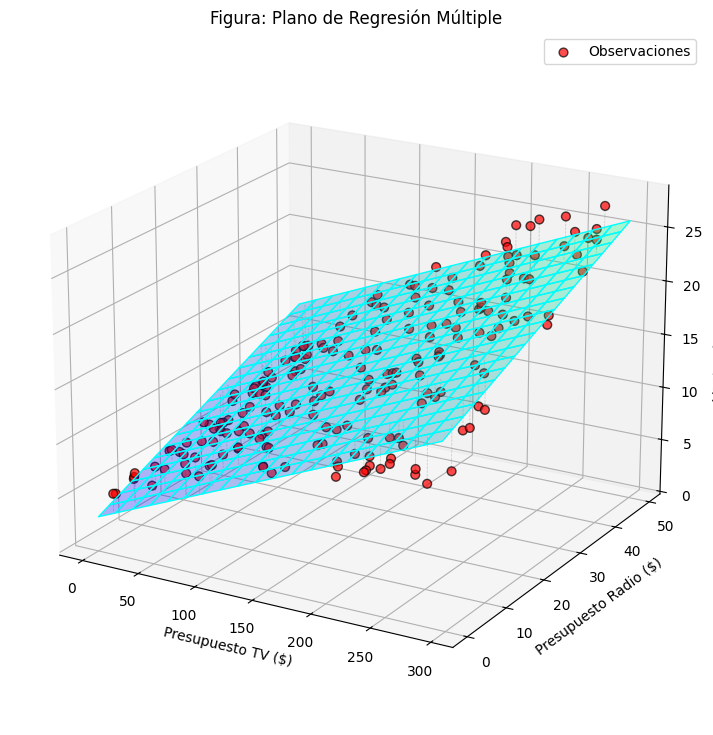

In [21]:
# Supongamos que df ya contiene los datos cargados de Advertising.csv
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Ajustar el modelo de Regresión Múltiple
model_multiple = LinearRegression()
model_multiple.fit(X, y)

# 3. Obtener e imprimir resultados
intercepto = model_multiple.intercept_
coeficientes = model_multiple.coef_
r_cuadrado = model_multiple.score(X, y)

print(f"--- Coeficientes del Modelo ---")
print(f"Intercepto (beta_0): {intercepto:.4f}")
print(f"Coeficiente TV (beta_1): {coeficientes[0]:.4f}")
print(f"Coeficiente Radio (beta_2): {coeficientes[1]:.4f}")
print(f"Coeficiente Newspaper (beta_3): {coeficientes[2]:.4f}")
print(f"\n--- Bondad de Ajuste ---")
print(f"R-cuadrado (R2): {r_cuadrado:.4f}")

# 3. Configuración del gráfico 3D (Basado en la Figura 3.4 del material)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos observados (en rojo)
# Cada punto representa una observación real (yi) [cite: 921]
ax.scatter(df['TV'], df['radio'], df['sales'], color='red', s=40, edgecolors='k', alpha=0.7, label='Observaciones')

# 4. Creación del plano de regresión
# El plano se elige para minimizar la suma de los cuadrados de las distancias verticales [cite: 921]
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 20)
radio_range = np.linspace(df['radio'].min(), df['radio'].max(), 20)
TV_grid, Radio_grid = np.meshgrid(tv_range, radio_range)

# Calculamos los valores estimados (Z) para el plano: ŷ = β0 + β1*X1 + β2*X2 [cite: 906]
Sales_plane = model_multiple.intercept_ + model_multiple.coef_[0] * TV_grid + model_multiple.coef_[1] * Radio_grid

# Graficar el plano de regresión
ax.plot_surface(TV_grid, Radio_grid, Sales_plane, color='cyan', alpha=0.3, cmap='winter')

# 5. Dibujar los residuos (líneas verticales grises)
# El residuo (ei) es la diferencia entre el valor observado y el predicho [cite: 503, 806]
for i in range(len(df)):
    y_hat = model_multiple.intercept_ + model_multiple.coef_[0] * df['TV'].iloc[i] + model_multiple.coef_[1] * df['radio'].iloc[i]
    ax.plot([df['TV'].iloc[i], df['TV'].iloc[i]],
            [df['radio'].iloc[i], df['radio'].iloc[i]],
            [df['sales'].iloc[i], y_hat],
            color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Etiquetas y orientación
ax.set_xlabel('Presupuesto TV ($)')
ax.set_ylabel('Presupuesto Radio ($)')
ax.set_zlabel('Ventas (Unidades)')
ax.set_title('Figura: Plano de Regresión Múltiple')
ax.view_init(elev=20, azim=-60)  # Ajuste de perspectiva

plt.legend()
plt.show()

---

## 10. Regresión Lineal Múltiple: Modelando en 3D

Cuando incluimos más de un predictor, el modelo se expande para capturar la influencia simultánea de múltiples variables. En este caso, analizamos cómo el presupuesto de **TV** () y **Radio** () impactan conjuntamente en las **Ventas** ().

La ecuación del modelo se define como:


### El Plano de Regresión

A diferencia de la regresión simple, aquí el algoritmo de **Mínimos Cuadrados** busca un plano (superficie plana en 3D) que minimice la suma de los cuadrados de las distancias verticales entre cada observación real y dicho plano.

---

## 11. Interpretación de los Coeficientes y Bondad de Ajuste

Los resultados obtenidos nos permiten cuantificar el "peso" de cada medio publicitario:

### A. Coeficientes del Modelo

* **Intercepto ():** Representa las ventas estimadas (aprox. 2,921 unidades) si no se invirtiera absolutamente nada ni en TV ni en Radio.
* **Coeficiente TV ():** Manteniendo constante la inversión en Radio, cada unidad adicional invertida en TV incrementa las ventas en **0.0458** unidades.
* **Coeficiente Radio ():** Manteniendo constante la inversión en TV, cada unidad adicional invertida en Radio incrementa las ventas en **0.1880** unidades.
* *Nota:* Fíjate que el coeficiente del Radio es mayor; esto sugiere que, por cada dólar invertido, el Radio tiene un impacto marginal más fuerte que la TV en este dataset.



### B. Análisis de la Bondad de Ajuste ()

* **:** Este valor es excelente. Indica que la combinación de TV y Radio explica casi el **90% de la varianza** en las ventas.
* **Comparación:** Al añadir el Radio, el modelo es capaz de explicar un **28.5% más** de la realidad que el modelo que solo usaba TV.

---

## 12. Visualización del Espacio de Características

El gráfico 3D es la herramienta definitiva para validar el modelo:

1. **Observaciones (Puntos Rojos):** Representan los datos reales recolectados ().
2. **Plano de Regresión (Cian):** Es la predicción del modelo (). Representa la tendencia central del fenómeno.
3. **Residuos (Líneas Grises):** Cada línea mide la diferencia entre el valor real y el valor que el plano predice ().
* Si las líneas son cortas, el modelo es muy preciso.
* Si los puntos están muy dispersos lejos del plano, el modelo tiene un error elevado.



---




## 13. Generación de Reporte Automatizado (EDA Pro)

El uso de `ydata-profiling` (anteriormente conocido como Pandas Profiling) nos permite obtener un **Reporte de Perfilado** completo. Este reporte es ideal para inspeccionar rápidamente la salud de los datos antes de formalizar los modelos de producción o enviarlos a revisión en tu investigación.

### Características del Reporte:

* **Análisis de Variables:** Estadísticas descriptivas, valores faltantes y distribución de cada columna.
* **Interacciones y Correlaciones:** Genera matrices de Pearson, Spearman y Phik de forma automática.
* **Alertas de Calidad:** Identifica variables con alta correlación (multicolinealidad), ceros constantes o sesgos extremos.
* **Portabilidad:** El resultado se exporta como un archivo **HTML interactivo**, lo que facilita compartir los hallazgos con otros investigadores o adjuntarlo a tu documentación en Overleaf.

---

### Nota técnica para Colab:

El uso de `.to_notebook_iframe()` es la forma más estable de visualizar estos reportes pesados dentro del entorno de Google Colab sin que la pestaña del navegador se bloquee por el uso de memoria.



In [22]:
!pip -q install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 5.3 MB/s eta 0:00:00


In [23]:
# Utilizamos la libreria recien instalada
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()  # lo embebe como iframe (funciona bien en Colab)
# Descarga el profile como archivo html
profile.to_file("reporte_perfil.html")
print("Archivo guardado:", "/content/reporte_perfil.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 87.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Archivo guardado: /content/reporte_perfil.html
